<a href="https://colab.research.google.com/github/Yigituysgl/AI-Powered-Fever-Detection-in-Livestock-using-Thermal-Imaging/blob/main/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()


Saving dataverse_files.zip to dataverse_files.zip


In [2]:
import zipfile
import os

zip_path = 'dataverse_files.zip'
extract_path = 'holstein_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extracted to:", extract_path)


✅ Extracted to: holstein_data


In [3]:
search_root = 'holstein_data'

image_paths = []
valid_exts = (".jpg", ".jpeg", ".png", ".tif", ".tiff")

for root, _, files in os.walk(search_root):
    for file in files:
        if file.lower().endswith(valid_exts):
            full_path = os.path.join(root, file)
            image_paths.append(full_path)

print(f"✅ Found {len(image_paths)} images.")



✅ Found 0 images.


In [4]:
import os

for root, dirs, files in os.walk('holstein_data'):
    print("📁", root)
    break


📁 holstein_data


In [5]:
print("Folders inside 'holstein_data':", os.listdir("holstein_data"))


Folders inside 'holstein_data': ['subset1.zip', 'subset3.zip', 'subset5.zip', 'MANIFEST.TXT', 'subset4.zip', 'subset2.zip']


In [6]:
import zipfile
import os

subset_dir = "holstein_data"
for filename in os.listdir(subset_dir):
    if filename.endswith(".zip"):
        zip_path = os.path.join(subset_dir, filename)
        extract_path = os.path.join(subset_dir, filename.replace(".zip", ""))
        print(f"📦 Extracting {filename}...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)

print("✅ All subset zip files extracted.")


📦 Extracting subset1.zip...
📦 Extracting subset3.zip...
📦 Extracting subset5.zip...
📦 Extracting subset4.zip...
📦 Extracting subset2.zip...
✅ All subset zip files extracted.


In [7]:
search_root = 'holstein_data'

image_paths = []
valid_exts = (".jpg", ".jpeg", ".png", ".tif", ".tiff")

for root, _, files in os.walk(search_root):
    for file in files:
        if file.lower().endswith(valid_exts):
            full_path = os.path.join(root, file)
            image_paths.append(full_path)

print(f"✅ Found {len(image_paths)} images.")


✅ Found 7422 images.


In [9]:
import pandas as pd
def find_pairs(root):
    records = []
    for dirpath, dirnames, filenames in os.walk(root):

        all_imgs = [os.path.join(dirpath, f) for f in filenames if f.lower().endswith((".jpg", ".jpeg"))]
        thermals = sorted([f for f in all_imgs if "thermal" in f.lower()])
        visibles = sorted([f for f in all_imgs if "visible" in f.lower()])
        if len(thermals) != len(visibles) or len(thermals) == 0:
            continue
        for t_path, v_path in zip(thermals, visibles):
            cow_id = os.path.basename(os.path.dirname(t_path))  # e.g., FLIR1234
            records.append({
                "cow_id": cow_id,
                "thermal": t_path,
                "visible": v_path
            })
    return pd.DataFrame(records)

df_pairs = find_pairs("holstein_data")
print(f"✅ Total image pairs found: {len(df_pairs)}")
df_pairs.head()



✅ Total image pairs found: 0


Empty DataFrame
Columns: []
Index: []

In [10]:

import random
random.shuffle(image_paths)

for path in image_paths[:10]:
    print(path)


holstein_data/subset2/__MACOSX/subset2/0655/._FLIR3594.jpg
holstein_data/subset4/subset4/7742/FLIR4780- full photo.jpg
holstein_data/subset3/__MACOSX/subset3/1263/._FLIR3175- full photo.jpg
holstein_data/subset3/__MACOSX/subset3/6769/._FLIR2669- full photo.jpg
holstein_data/subset4/__MACOSX/subset4/7877/._FLIR2276- full photo.jpg
holstein_data/subset3/subset3/6940/FLIR5894- photo.jpg
holstein_data/subset3/subset3/7085/FLIR3019- full photo.jpg
holstein_data/subset1/subset1/0431/FLIR2022- full photo.jpg
holstein_data/subset3/__MACOSX/subset3/1064/._FLIR4141.jpg
holstein_data/subset2/__MACOSX/subset2/0749/._FLIR5240- full photo.jpg


In [11]:
import os
import pandas as pd
from collections import defaultdict

def find_pairs_by_id(root):
    thermal_map = {}
    visible_map = {}

    for dirpath, _, filenames in os.walk(root):
        if '__MACOSX' in dirpath:
            continue
        for f in filenames:
            if not f.lower().endswith((".jpg", ".jpeg")):
                continue
            if not f.lower().startswith("flir"):
                continue
            img_id = f.split('-')[0].split('.')[0].strip()
            full_path = os.path.join(dirpath, f)
            if "full" in f.lower():
                visible_map[img_id] = full_path
            else:
                thermal_map[img_id] = full_path


    common_ids = sorted(set(thermal_map.keys()) & set(visible_map.keys()))
    print(f"Found {len(common_ids)} paired IDs")

    records = []
    for img_id in common_ids:
        records.append({
            "cow_id": img_id,
            "thermal": thermal_map[img_id],
            "visible": visible_map[img_id]
        })

    return pd.DataFrame(records)


df_pairs = find_pairs_by_id("holstein_data")
print(f"✅ Total matched image pairs: {len(df_pairs)}")
df_pairs.head()


Found 1237 paired IDs
✅ Total matched image pairs: 1237


cow_id                                            thermal  \
0  FLIR1493    holstein_data/subset3/subset3/0940/FLIR1493.jpg   
1  FLIR1496    holstein_data/subset2/subset2/0513/FLIR1496.jpg   
2  FLIR1497    holstein_data/subset5/subset5/8204/FLIR1497.jpg   
3  FLIR1498  holstein_data/subset2/subset2/0644/FLIR1498- p...   
4  FLIR1500  holstein_data/subset4/subset4/7135/FLIR1500- p...   

                                             visible  
0  holstein_data/subset3/subset3/0940/FLIR1493- f...  
1  holstein_data/subset2/subset2/0513/FLIR1496- f...  
2  holstein_data/subset5/subset5/8204/FLIR1497- f...  
3  holstein_data/subset2/subset2/0644/FLIR1498- f...  
4  holstein_data/subset4/subset4/7135/FLIR1500- f...

In [12]:

TARGET_SIZE = (224, 224)
ROI_CFG = {
    "head": (0.00, 0.20),
    "udder": (0.70, 1.00),
}


import numpy as np
from PIL import Image
import cv2

def load_resize(fp, size=TARGET_SIZE):
    img = Image.open(fp).convert("RGB")
    img = img.resize(size, resample=Image.BILINEAR)
    return np.array(img)

def thermal_to_mask(img_rgb):
    hsv  = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
    gray = hsv[..., 2]
    gray = cv2.GaussianBlur(gray, (9, 9), 0)

    _, mask = cv2.threshold(
        gray, 0, 255,
        cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    cnts, _ = cv2.findContours(
        mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not cnts:
        return np.zeros_like(mask)

    big = max(cnts, key=cv2.contourArea)

    clean = np.zeros_like(mask)
    cv2.drawContours(clean, [big], -1, 255, -1)

    kernel = np.ones((9, 9), np.uint8)
    clean  = cv2.morphologyEx(
        clean, cv2.MORPH_CLOSE, kernel, iterations=3)

    return clean


In [13]:
def mean_temp_in_roi(thermal_rgb, mask, roi_range):
    """
    Estimate mean pixel intensity (proxy for temperature) in a vertical slice of the mask.
    """
    h = mask.shape[0]
    y0, y1 = int(h * roi_range[0]), int(h * roi_range[1])


    roi_mask = np.zeros_like(mask)
    roi_mask[y0:y1, :] = mask[y0:y1, :]
    idx = roi_mask > 0


    hsv = cv2.cvtColor(thermal_rgb, cv2.COLOR_RGB2HSV)
    values = hsv[:, :, 2][idx]

    if len(values) == 0:
        return np.nan
    return values.mean()


In [14]:
records = []

for i, row in df_pairs.iterrows():
    ther = load_resize(row['thermal'])
    mask = thermal_to_mask(ther)

    roi_stats = {}
    for roi_name, roi_range in ROI_CFG.items():
        roi_stats[f"{roi_name}_meanV"] = mean_temp_in_roi(ther, mask, roi_range)

    record = {
        "cow_id": row['cow_id'],
        "thermal_path": row['thermal'],
        "visible_path": row['visible'],
        **roi_stats
    }
    records.append(record)

df_temps = pd.DataFrame(records)
print("✅ Done. Shape:", df_temps.shape)
df_temps.head()


✅ Done. Shape: (1237, 5)


cow_id                                       thermal_path  \
0  FLIR1493    holstein_data/subset3/subset3/0940/FLIR1493.jpg   
1  FLIR1496    holstein_data/subset2/subset2/0513/FLIR1496.jpg   
2  FLIR1497    holstein_data/subset5/subset5/8204/FLIR1497.jpg   
3  FLIR1498  holstein_data/subset2/subset2/0644/FLIR1498- p...   
4  FLIR1500  holstein_data/subset4/subset4/7135/FLIR1500- p...   

                                        visible_path  head_meanV  udder_meanV  
0  holstein_data/subset3/subset3/0940/FLIR1493- f...         NaN          NaN  
1  holstein_data/subset2/subset2/0513/FLIR1496- f...         NaN          NaN  
2  holstein_data/subset5/subset5/8204/FLIR1497- f...         NaN          NaN  
3  holstein_data/subset2/subset2/0644/FLIR1498- f...  200.826096   165.945915  
4  holstein_data/subset4/subset4/7135/FLIR1500- f...  186.862520   131.819644

In [15]:
df_temps = df_temps.dropna(subset=['head_meanV', 'udder_meanV']).reset_index(drop=True)
print("After dropping NaNs:", df_temps.shape)


After dropping NaNs: (665, 5)


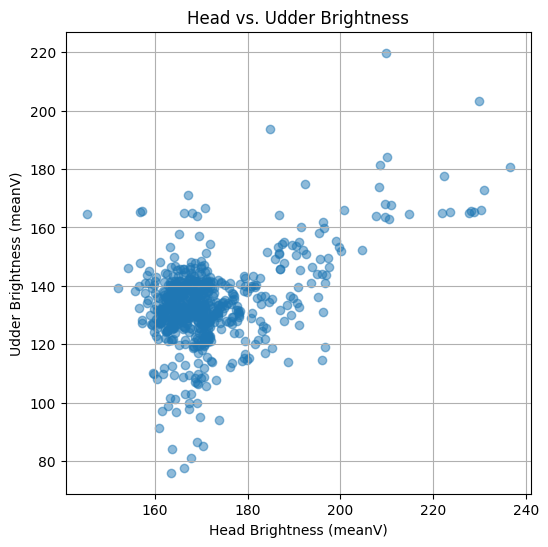

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(df_temps['head_meanV'], df_temps['udder_meanV'], alpha=0.5)
plt.xlabel('Head Brightness (meanV)')
plt.ylabel('Udder Brightness (meanV)')
plt.title('Head vs. Udder Brightness')
plt.grid(True)
plt.show()


In [17]:
mu = df_temps['udder_meanV'].mean()
sigma = df_temps['udder_meanV'].std()


df_temps['fever_flag'] = df_temps['udder_meanV'] > (mu + 2 * sigma)

print("⚠️ Fever cases:", df_temps['fever_flag'].sum())
df_temps[df_temps['fever_flag']].head()


⚠️ Fever cases: 32


cow_id                                       thermal_path  \
0   FLIR1498  holstein_data/subset2/subset2/0644/FLIR1498- p...   
43  FLIR1621    holstein_data/subset1/subset1/0185/FLIR1621.jpg   
46  FLIR1641    holstein_data/subset1/subset1/0341/FLIR1641.jpg   
49  FLIR1649    holstein_data/subset2/subset2/0686/FLIR1649.jpg   
51  FLIR1658    holstein_data/subset3/subset3/6700/FLIR1658.jpg   

                                         visible_path  head_meanV  \
0   holstein_data/subset2/subset2/0644/FLIR1498- f...  200.826096   
43  holstein_data/subset1/subset1/0185/FLIR1621- f...  184.714996   
46  holstein_data/subset1/subset1/0341/FLIR1641- f...  167.982549   
49  holstein_data/subset2/subset2/0686/FLIR1649- f...  210.824786   
51  holstein_data/subset3/subset3/6700/FLIR1658- f...  209.808511   

    udder_meanV  fever_flag  
0    165.945915        True  
43   193.652142        True  
46   164.777311        True  
49   167.654028        True  
51   219.788224        True

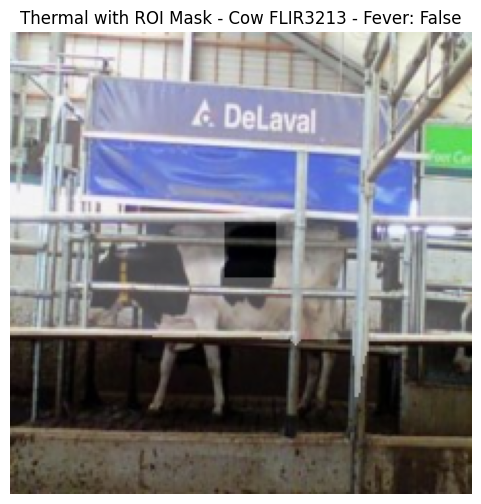

In [18]:
import matplotlib.pyplot as plt
import random


sample = df_temps.sample(1).iloc[0]


thermal = load_resize(sample['thermal_path'])
mask = thermal_to_mask(thermal)


plt.figure(figsize=(6, 6))
plt.imshow(thermal)
plt.imshow(mask, cmap='gray', alpha=0.3)
plt.title(f"Thermal with ROI Mask - Cow {sample['cow_id']} - Fever: {sample['fever_flag']}")
plt.axis('off')
plt.show()


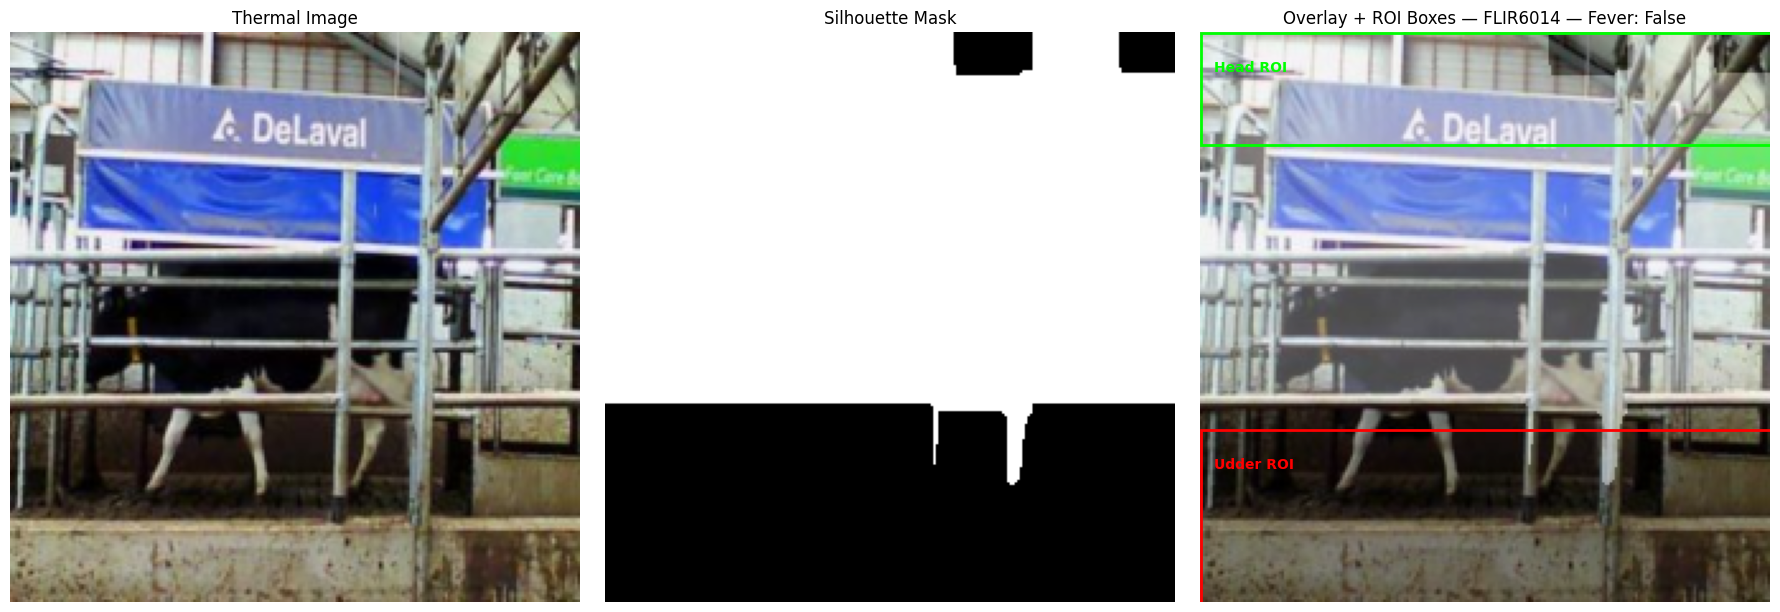

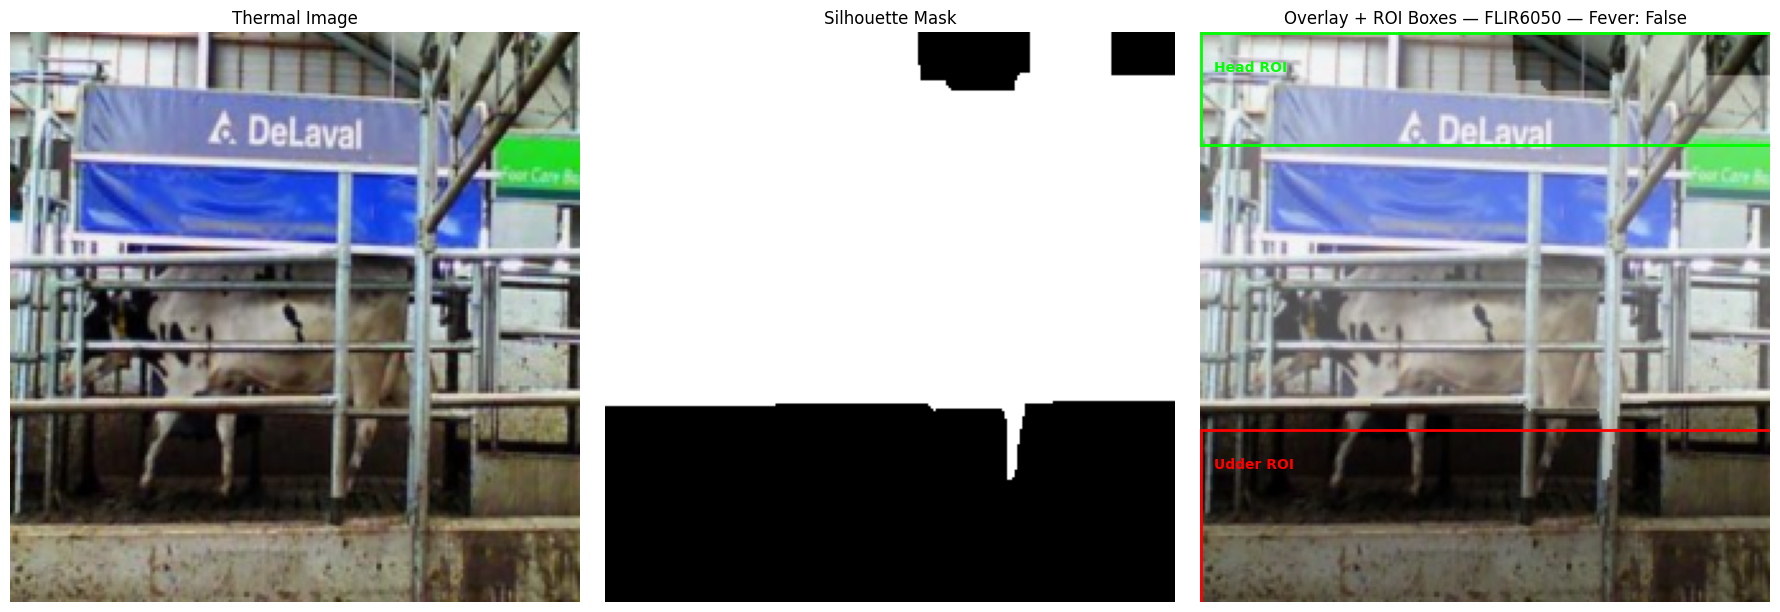

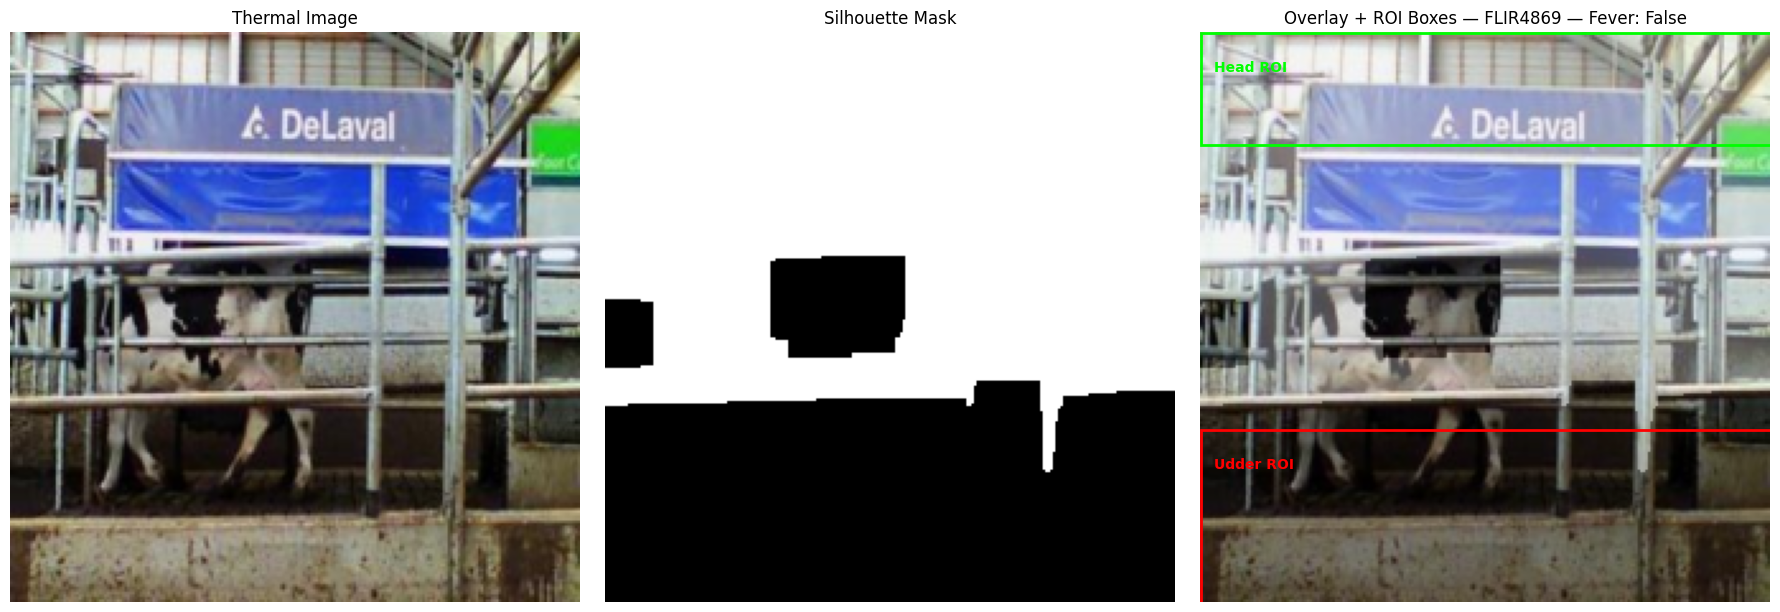

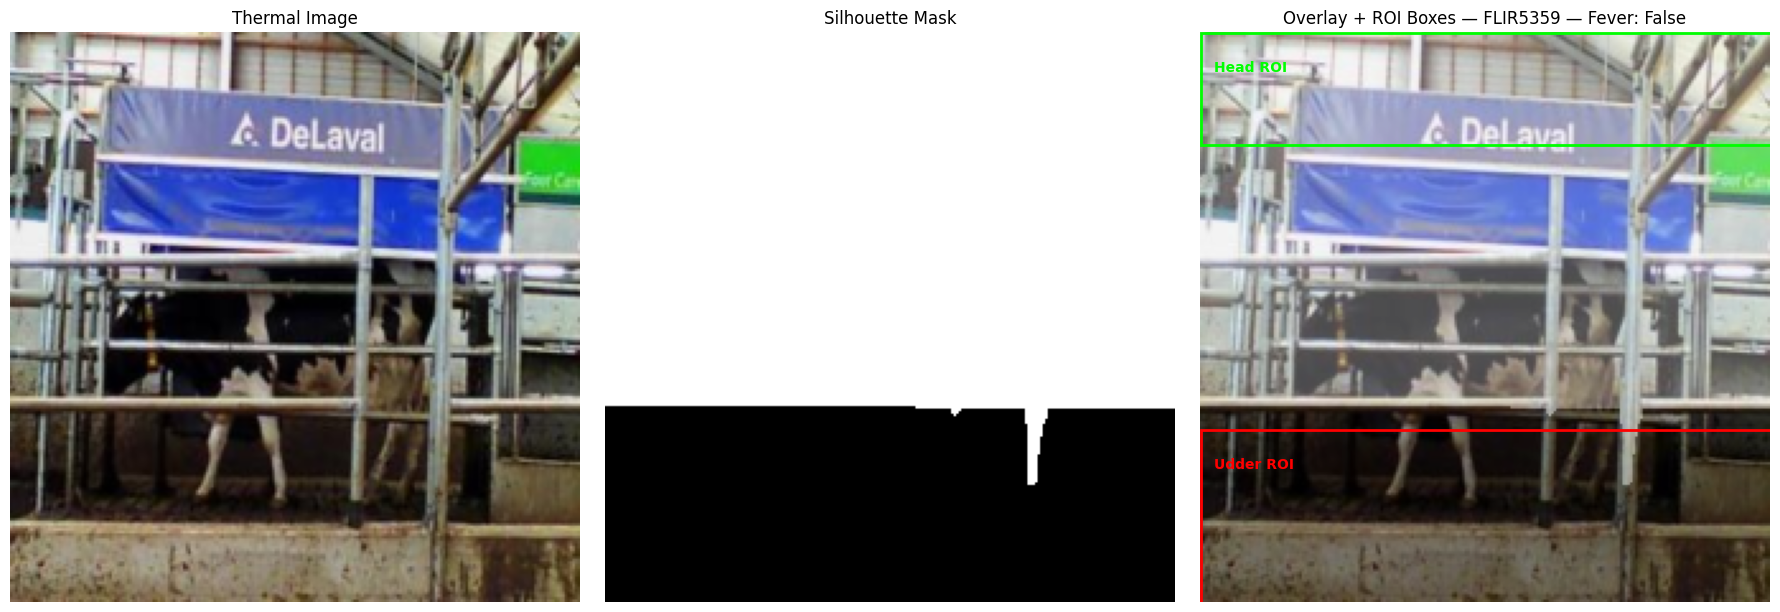

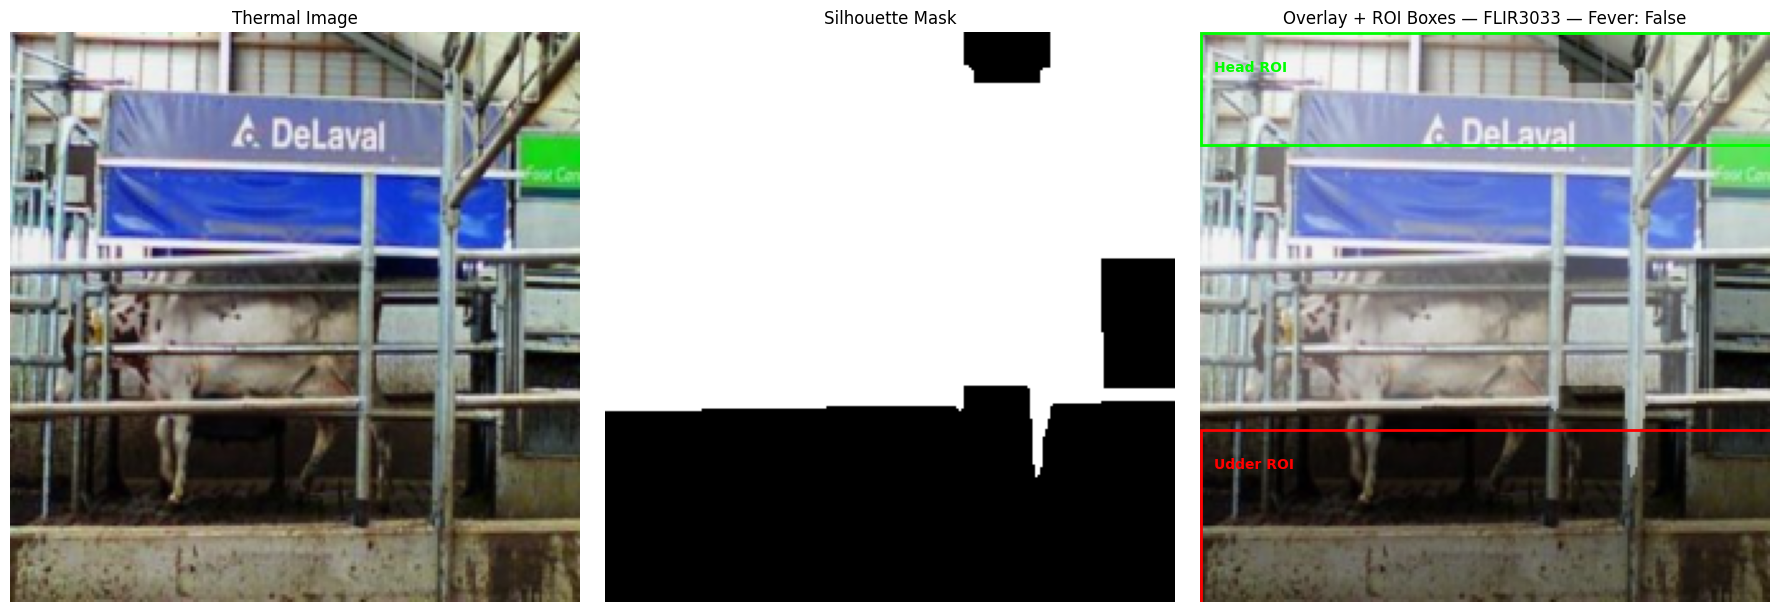

In [19]:
import matplotlib.pyplot as plt
import cv2

def plot_roi_visual(sample):
    thermal = load_resize(sample['thermal_path'])
    mask = thermal_to_mask(thermal)

    h, w = mask.shape
    head_box = [0, 0, w, int(0.2 * h)]
    udder_box = [0, int(0.7 * h), w, h]

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))


    axes[0].imshow(thermal)
    axes[0].set_title("Thermal Image")
    axes[0].axis('off')


    axes[1].imshow(mask, cmap='gray')
    axes[1].set_title("Silhouette Mask")
    axes[1].axis('off')


    axes[2].imshow(thermal)
    axes[2].imshow(mask, cmap='gray', alpha=0.3)


    for box, label, color in zip([head_box, udder_box], ['Head ROI', 'Udder ROI'], ['lime', 'red']):
        x, y, x2, y2 = box[0], box[1], box[2], box[3]
        axes[2].add_patch(plt.Rectangle((x, y), x2 - x, y2 - y, edgecolor=color, facecolor='none', lw=2))
        axes[2].text(x + 5, y + 15, label, color=color, fontsize=10, weight='bold')


    fever_text = f"Fever: {sample['fever_flag']}"
    axes[2].set_title(f"Overlay + ROI Boxes — {sample['cow_id']} — {fever_text}")
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()


for _ in range(5):
    sample = df_temps.sample(1).iloc[0]
    plot_roi_visual(sample)


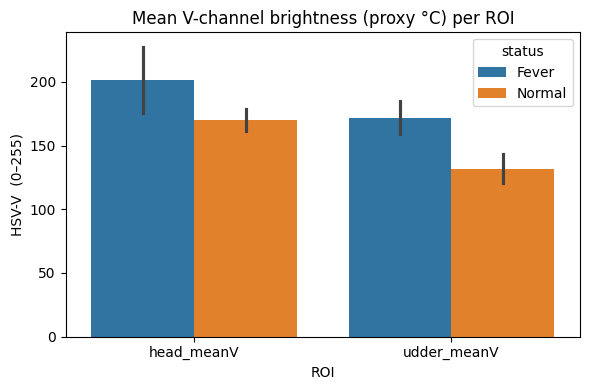

In [20]:
import seaborn as sns, matplotlib.pyplot as plt


viz_df = df_temps.dropna(subset=['head_meanV','udder_meanV']).copy()

viz_df['status'] = viz_df['fever_flag'].map({True:'Fever', False:'Normal'})

fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(
    data=viz_df.melt(
        id_vars=['status'],
        value_vars=['head_meanV','udder_meanV'],
        var_name='ROI', value_name='meanV'),
    x='ROI', y='meanV', hue='status', ax=ax, errorbar='sd')

ax.set_title('Mean V-channel brightness (proxy °C) per ROI')
ax.set_ylabel('HSV-V  (0–255)')
plt.tight_layout(); plt.show()


In [21]:
!pip install -q torch torchvision timm torchmetrics grad-cam==1.4.6
import torch, torchvision
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
import pandas as pd, numpy as np, cv2, matplotlib.pyplot as plt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.5 MB/s e

In [22]:
MEAN = [0.5]*3 ; STD = [0.5]*3

tfm_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.Normalize(MEAN, STD)
])
tfm_val = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224,224)),
    transforms.Normalize(MEAN, STD)
])

class HolsteinThermal(Dataset):
    def __init__(self, df, tfm):
        self.df = df.reset_index(drop=True)
        self.tfm = tfm
    def __len__(self):  return len(self.df)
    def __getitem__(self, idx):
        row   = self.df.iloc[idx]
        img   = Image.open(row["thermal_path"]).convert("RGB")
        x     = self.tfm(img)
        y     = torch.tensor(row["label"], dtype=torch.float32)
        return x, y


In [23]:
df = df_temps.copy()
df["label"] = df["fever_flag"].astype(int)
print(df["label"].value_counts())


label
0    633
1     32
Name: count, dtype: int64


In [24]:
train_df = df.sample(frac=0.8, random_state=0)
val_df   = df.drop(train_df.index)

train_dl = DataLoader(HolsteinThermal(train_df, tfm_train),
                      batch_size=32, shuffle=True,  num_workers=2)
val_dl   = DataLoader(HolsteinThermal(val_df,   tfm_val),
                      batch_size=32, shuffle=False, num_workers=2)


In [25]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using", device)


model = models.resnet18(weights="IMAGENET1K_V1")
model.fc = nn.Sequential(
    nn.Dropout(0.25),
    nn.Linear(model.fc.in_features, 1)
)
model = model.to(device)

Using cpu


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 74.3MB/s]


In [26]:

pos_weight = torch.tensor(
    [(len(train_df) - train_df["label"].sum()) / train_df["label"].sum()]
).to(device)          # << use device, not "cuda"

criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimiser = optim.Adam(model.parameters(), lr=3e-4)


In [27]:
def run_epoch(dl, train):
    model.train(train)
    loss_sum, n = 0, 0
    for x, y in dl:
        x, y = x.to(device), y.to(device).unsqueeze(1)
        if train:
            optimiser.zero_grad()
        y_hat = model(x)
        loss  = criterion(y_hat, y)
        if train:
            loss.backward(); optimiser.step()
        loss_sum += loss.item()*len(y); n += len(y)
    return loss_sum/n

for epoch in range(10):
    tl = run_epoch(train_dl, True)
    vl = run_epoch(val_dl,   False)
    print(f"epoch {epoch:02d} | train {tl:.3f} | val {vl:.3f}")


epoch 00 | train 0.469 | val 0.000
epoch 01 | train 0.088 | val 0.007
epoch 02 | train 0.038 | val 0.006
epoch 03 | train 0.029 | val 0.006
epoch 04 | train 0.125 | val 0.040
epoch 05 | train 0.044 | val 0.035
epoch 06 | train 0.086 | val 0.003
epoch 07 | train 0.026 | val 0.010
epoch 08 | train 0.026 | val 0.002
epoch 09 | train 0.017 | val 0.006


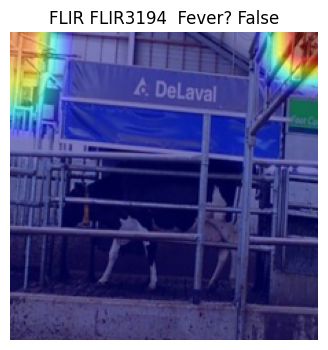

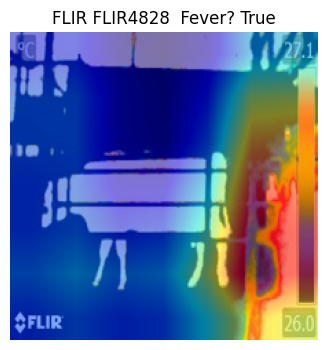

In [28]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image


target_layers = [model.layer4[-1]]
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=False)  # CPU

def show_grad_cam(row):
    img = Image.open(row["thermal_path"]).convert("RGB")
    rgb = np.array(img.resize((224, 224))) / 255.0
    tensor = tfm_val(img).unsqueeze(0).to(device)

    mask = cam(tensor)[0]
    vis = show_cam_on_image(rgb, mask, use_rgb=True)

    plt.figure(figsize=(4, 4))
    plt.imshow(vis)
    plt.title(f"FLIR {row['cow_id']}  Fever? {bool(row['label'])}")
    plt.axis("off")
    plt.show()


show_grad_cam(train_df[train_df["label"] == 0].iloc[0])
show_grad_cam(train_df[train_df["label"] == 1].iloc[0])


In [29]:
from sklearn.metrics import classification_report, confusion_matrix


y_true, y_pred = [], []
model.eval()
with torch.no_grad():
    for xb, yb in val_dl:
        xb = xb.to(device)
        preds = model(xb).squeeze(1)
        y_true.extend(yb.cpu().numpy())
        y_pred.extend((torch.sigmoid(preds) > 0.5).int().cpu().numpy())


print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, digits=3))


[[129   0]
 [  0   4]]
              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000       129
         1.0      1.000     1.000     1.000         4

    accuracy                          1.000       133
   macro avg      1.000     1.000     1.000       133
weighted avg      1.000     1.000     1.000       133



              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000       129
         1.0      1.000     1.000     1.000         4

    accuracy                          1.000       133
   macro avg      1.000     1.000     1.000       133
weighted avg      1.000     1.000     1.000       133



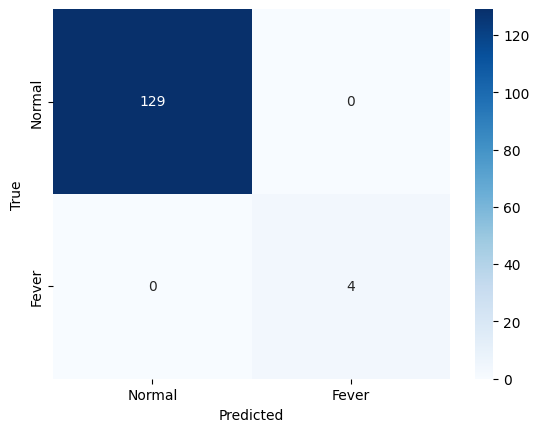

In [30]:
print(classification_report(y_true, y_pred, digits=3))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal","Fever"],
            yticklabels=["Normal","Fever"])
plt.xlabel("Predicted"); plt.ylabel("True"); plt.show()


In [34]:
torch.save(model.state_dict(), "resnet18_fever_detector.pth")


In [33]:
def predict_single_image(image_path):
    img = Image.open(image_path).convert("RGB")
    img_tensor = tfm_val(img).unsqueeze(0).to(device)
    model.eval()
    with torch.no_grad():
        pred = torch.sigmoid(model(img_tensor)).item()
    return "Fever" if pred > 0.5 else "Normal", pred
